<a href="https://colab.research.google.com/github/Da-Heon/Record_DataAnalysis/blob/main/RFM_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RFM분석

- RFM분석은 고객의 가치를 평가하기 위해 세 가지 지표를 사용합니다.
    - Recency(최근 구매 시점): 고객이 마지막으로 구매한 시점(최근성이 높을수록 긍정적)
    - Frequency(구매빈도): 일정 기간 동안 구매한 횟수(구매 빈도가 높을수록 충성도가 높다)
    - Monetary(구매금액): 구매에 사용한 총 금액(높은 지출은 높은 가치로 평가)
- VIP, 잠재고객, 이탈위험고객 등 구분해서 맞춤형 마케팅 전략을 수립하는 것이 목적

- RFM분석 절차
    - 1. 데이터 수집
        - 고객의 구매(또는 사용) 기록, 주문일, 구매 금액 등 데이터를 수집합니다.
        - 주문 데이터베이스나 CRM 시스템에서 고객별 주문 내역
    - 2. RFM 지표 계산
        - Recency
            - 고객이 마지막으로 구매한 날짜와 기준일(예: 분석일) 사이의 일수 차이를 계산합니다.
            - 값이 낮을수록 최근에 구매했음을 의미합니다.
        - Frequency
            - 일정 기간 동안 고객이 얼마나 자주 구매했는지를 계산
        - Monetary
            - 일정 기간 동안 고객이 지출한 총 금액을 계산
    - 3. 점수화
        - 각 지표를 점수화합니다.
        - 분위수 방식: 상위 20%를 5점, 하위20%를 1점... 등
        - 임의 구간 방식: 비즈니스 상황에 따라 직접 구간을 정의
    - 4. 고객 세분화(세그먼트 생성)
        - 각 고객의 R, F, M 점수를 합산하거나 문자열 형태(예: "5-4-3")로 조합하여, 고객을 그룹화합니다.
            - VIP고객
            - 잠재 고객
            - 이탈 위험 고개

## 1. 환경설정

In [ ]:
!pip install koreanize_matplotlib -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns', None)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 47.5 MB/s eta 0:00:00


## 2. 데이터 불러오기

In [ ]:
data_path = '/content/drive/MyDrive/코드잇_데이터분석_6기/12_지표 이해하기/data/customer_data.csv'
customer_df = pd.read_csv(data_path, sep='\t')
customer_df.head()

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,5,6,5,0,0,0,0,0,0,11


## 3. 데이터 구조 확인 & 전처리

In [ ]:
customer_df.shape

(2240, 23)

In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2240 non-null   int64  
 1   signup_ym              2240 non-null   object 
 2   birth_year             2240 non-null   int64  
 3   annual_income          2216 non-null   float64
 4   marital_status         2240 non-null   object 
 5   children               2240 non-null   int64  
 6   recency                2240 non-null   int64  
 7   amount_alcohol         2240 non-null   int64  
 8   amount_fruit           2240 non-null   int64  
 9   amount_meat            2240 non-null   int64  
 10  amount_fish            2240 non-null   int64  
 11  amount_snack           2240 non-null   int64  
 12  amount_general         2240 non-null   int64  
 13  num_purchase_web       2240 non-null   int64  
 14  num_purchase_store     2240 non-null   int64  
 15  num_

In [ ]:
# 결측치 갯수 확인
# income 컬럼에서 24개의 결측치가 있습니다.
customer_df.isna().sum()

,0
ID,0
signup_ym,0
birth_year,0
annual_income,24
marital_status,0
children,0
recency,0
amount_alcohol,0
amount_fruit,0
amount_meat,0


In [ ]:
customer_df = customer_df.dropna()
customer_df.isna().sum()

,0
ID,0
signup_ym,0
birth_year,0
annual_income,0
marital_status,0
children,0
recency,0
amount_alcohol,0
amount_fruit,0
amount_meat,0


In [ ]:
customer_df.shape

(2216, 23)

In [ ]:
customer_df.head(1)

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,8,4,3,0,0,0,0,0,1,11


In [ ]:
# 나이 컬럼 생성
customer_df.loc[:, 'birth_year'] = 2025 - customer_df['birth_year']

In [ ]:
customer_df.rename(columns={'birth_year': 'age'}, inplace=True)

In [ ]:
customer_df.head(1)

,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,60,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,8,4,3,0,0,0,0,0,1,11


- 제품 카테고리
    - 술
    - 과일
    - 고기
    - 생선
    - 과자
    - 잡화물품

In [ ]:
# 모든 카테고리에 대한 총 금액
amount_total = customer_df['amount_alcohol']\
+customer_df['amount_fruit']\
+customer_df['amount_meat']\
+customer_df['amount_fish']\
+customer_df['amount_snack']\
+customer_df['amount_general']

In [ ]:
# 모든 카테고리에 대한 총 금액 컬럼을 기존 데이터프레임 추가
index_amount_general = customer_df.columns.get_loc('amount_general')
index_amount_general

12

In [ ]:
customer_df.insert(
    loc=index_amount_general + 1,
    column='amount_total',
    value=amount_total
)

In [ ]:
customer_df.head()

,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,60,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,2102100,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,63,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,35100,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,52,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,1008800,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,33,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,68900,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,36,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,548600,5,6,5,0,0,0,0,0,0,11


In [ ]:
# 구매 횟수 컬럼 생성
num_purchase_total = \
(customer_df['num_purchase_web']\
+customer_df['num_purchase_store']\
+customer_df['num_purchase_discount'])

In [ ]:
num_purchase_total

,0
0,15
1,5
2,19
3,8
4,16
...,...
2235,15
2236,20
2237,16
2238,18


In [ ]:
index_num_purchase = \
customer_df.columns.get_loc('num_purchase_discount')
index_num_purchase

16

In [ ]:
customer_df.insert(
    loc=index_num_purchase + 1,
    column='num_purchase_total',
    value=num_purchase_total
)

In [ ]:
customer_df.head()

,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,60,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,2102100,8,4,3,15,0,0,0,0,0,1,11
1,2174,2022-06,63,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,35100,1,2,2,5,0,0,0,0,0,0,11
2,4141,2021-11,52,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,1008800,8,10,1,19,0,0,0,0,0,0,11
3,6182,2022-05,33,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,68900,2,4,2,8,0,0,0,0,0,0,11
4,5324,2022-04,36,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,548600,5,6,5,16,0,0,0,0,0,0,11


## 4. 인구통계학적 고객 정보 분석

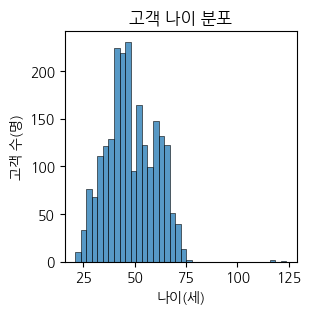

In [ ]:
# 나이 분포 확인
plt.figure(figsize=(3, 3))
sns.histplot(data=customer_df['age'])

plt.title('고객 나이 분포')
plt.xlabel('나이(세)')
plt.ylabel('고객 수(명)')

plt.show();

- 30대에서 40대 고객 수가 제일 많은 것으로 보이고,
- 20대, 70대에 가까워질수록 고객의 수가 점점 줄어들고 있습니다.
- 나이가 120세에 가까운 고객이 있는데, 이상치로 판단하고 제거

In [ ]:
# 나이 내림차순 정렬
customer_df.sort_values(by='age', ascending=False).head()

,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
239,11004,2022-08,124,78236600.0,미혼,1,23,10400,0,6500,9100,0,2600,28600,1,2,1,4,0,0,0,0,0,0,11
339,1150,2021-12,118,108591600.0,배우자 있음,0,36,981500,187200,730600,135200,83200,291200,2408900,4,4,1,9,0,0,0,0,1,0,11
192,7829,2021-12,117,47632000.0,이혼,1,99,19500,7800,10400,9100,5200,32500,84500,2,2,1,5,0,0,0,0,0,0,11
1950,6663,2021-10,77,66483300.0,미혼,0,96,187200,0,9100,0,0,7800,204100,3,4,1,8,0,0,0,0,0,0,11
424,6932,2021-07,76,120935100.0,배우자 있음,0,77,1670500,54600,930800,71500,0,27300,2754700,7,5,0,12,0,0,0,0,1,0,11


In [ ]:
# made by glass
customer_df = customer_df[customer_df['age'] <= 116]

In [ ]:
customer_df.sort_values(by='age', ascending=False).head()

,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
1950,6663,2021-10,77,66483300.0,미혼,0,96,187200,0,9100,0,0,7800,204100,3,4,1,8,0,0,0,0,0,0,11
424,6932,2021-07,76,120935100.0,배우자 있음,0,77,1670500,54600,930800,71500,0,27300,2754700,7,5,0,12,0,0,0,0,1,0,11
1150,1453,2021-10,74,74766900.0,사별,0,59,955500,52000,237900,67600,26000,39000,1378000,9,13,2,24,0,0,0,0,0,0,11
894,8800,2021-04,74,63632400.0,이혼,0,53,568100,10400,267800,208000,63700,54600,1172600,7,5,2,14,0,0,1,0,0,1,11
358,6142,2021-11,74,84594900.0,배우자 있음,0,65,817700,22100,230100,89700,0,10400,1170000,5,5,1,11,0,0,0,0,0,0,11


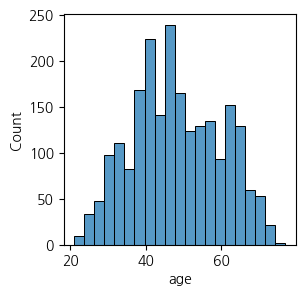

In [ ]:
# 다시 나이 분포 확인
plt.figure(figsize=(3, 3))
sns.histplot(data=customer_df['age'])
plt.show()

In [ ]:
customer_df.describe()

,ID,age,annual_income,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
count,2213.000000,2213.000000,2.213000e+03,2213.000000,2213.000000,2.213000e+03,2213.000000,2.213000e+03,2213.000000,2213.000000,2213.000000,2.213000e+03,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.0
mean,5586.899232,48.082693,6.790756e+07,0.947582,49.007682,3.966997e+05,34221.192951,2.170512e+05,48925.937641,35145.232716,57084.862178,7.891282e+05,4.087664,5.805242,2.325350,12.218256,0.064166,0.013556,0.073656,0.074108,0.072752,0.150474,11.0
std,3247.819194,11.700216,3.273218e+07,0.749297,28.941864,4.384971e+05,51656.711025,2.914940e+05,71192.261181,53411.062876,67209.670117,7.832353e+05,2.741664,3.250752,1.924402,5.860169,0.245104,0.115666,0.261269,0.262005,0.259788,0.357617,0.0
min,0.000000,21.000000,2.249000e+06,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,6.500000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
25%,2815.000000,40.000000,4.581980e+07,0.000000,24.000000,3.120000e+04,2600.000000,2.080000e+04,3900.000000,1300.000000,11700.000000,8.970000e+04,2.000000,3.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
50%,5455.000000,47.000000,6.678490e+07,1.000000,49.000000,2.275000e+05,10400.000000,8.840000e+04,15600.000000,10400.000000,31200.000000,5.161000e+05,4.000000,5.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
75%,8420.000000,58.000000,8.903310e+07,1.000000,74.000000,6.565000e+05,42900.000000,3.016000e+05,65000.000000,42900.000000,72800.000000,1.362400e+06,6.000000,8.000000,3.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
max,11191.000000,77.000000,8.666658e+08,3.000000,99.000000,1.940900e+06,258700.000000,2.242500e+06,336700.000000,340600.000000,417300.000000,3.282500e+06,27.000000,13.000000,15.000000,33.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.0


In [ ]:
# 나이대별 그룹화 컬럼 생성
age_bins = list(range(10, 81, 10))
age_labels = [f"{x}대" for x in age_bins[:-1]]
age_group = pd.cut(
    x=customer_df['age'],
    bins=age_bins,
    labels=age_labels,
    right=False
    )

In [ ]:
index_age_group = customer_df.columns.get_loc('age')
customer_df.insert(
    loc=index_age_group + 1,
    column='age_group',
    value=age_group
)

In [ ]:
customer_df['age_group'].value_counts()

,count
age_group,
40대,725
50대,483
30대,429
60대,402
20대,119
70대,55
10대,0


In [ ]:
# 10대와 70대의 숫자가 부족합니다.
# 즉, 표본의 수가 너무 적으면
# 해당 연령대에 대한 통계수치의 신뢰성이 낮아지고
# 분석 결과가 왜곡될 수 있습니다.

# 10대, 20대를 20대 이하
# 60대, 70대를 60대 이상
age_group_replace_dict = {
    '10대': '20대 이하',
    '20대': '20대 이하',
    '60대': '60대 이상',
    '70대': '60대 이상'
}
customer_df['age_group'] = \
customer_df['age_group'].replace(age_group_replace_dict)

In [ ]:
# 연령대 전처리 후 값 분포 확인
customer_df['age_group'].value_counts()

,count
age_group,
40대,725
50대,483
60대 이상,457
30대,429
20대 이하,119


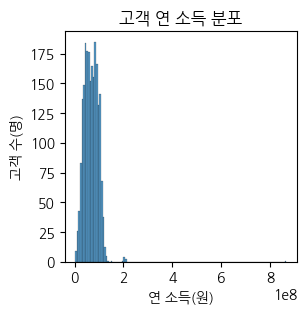

In [ ]:
# 소득별 고객 분포 확인
plt.figure(figsize=(3, 3))
sns.histplot(data=customer_df['annual_income'])
plt.title('고객 연 소득 분포')
plt.xlabel('연 소득(원)')
plt.ylabel('고객 수(명)')
plt.show()

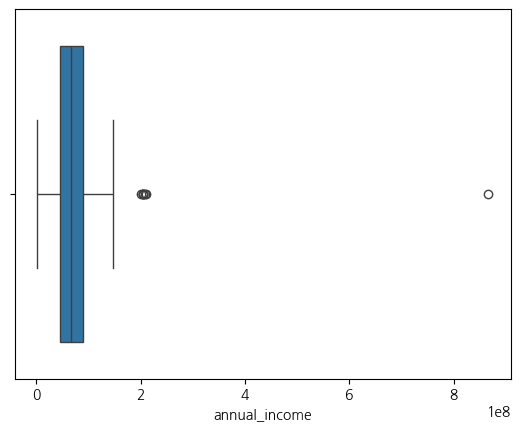

In [ ]:
# 이상치가 존재하는 것을 확인
# 박스플롯을 그려서 확인
sns.boxplot(data=customer_df, x='annual_income');

In [ ]:
# IQR 방식을 사용한 이상치 제거
income = customer_df['annual_income']

q3 = income.quantile(0.75)
q1 = income.quantile(0.25)
iqr = q3 - q1

lower_limit = q1 - (1.5 * iqr)
upper_limit = q3 + (1.5 * iqr)

condition = (income >= lower_limit) & (income <= upper_limit)
customer_df = customer_df[condition]

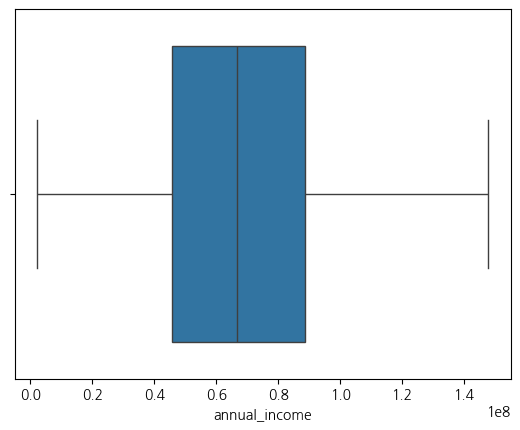

In [ ]:
sns.boxplot(data=customer_df, x='annual_income');

---

In [ ]:
# pandas 문법 하나 배우기
# pandas.qcut(x, q, labels)
# 데이터 분포를 기반으로 균등한 구간으로 나누는 기능
# 데이터를 균등하게 분할하기 때문에, 각 구간에 포함되는 데이터 수가 대체로 동일하게 됩니다.

data = list(range(10, 110, 10))
df = pd.DataFrame({'value': data})

In [ ]:
# 데이터를 4개의 균등 구간으로 나누기
df['value_quartile'] = pd.qcut(df['value'], 4, labels=[1, 2, 3, 4])

In [ ]:
df

,value,value_quartile
0,10,1
1,20,1
2,30,1
3,40,2
4,50,2
5,60,3
6,70,3
7,80,4
8,90,4
9,100,4


---

## 5. RFM 고객 세분화

- RFM 분석에서 보통 R, F, M 각각을 구간화(qcut 등)하여 1, 2, 3 같은 범주형 등급올 부여합니다.
    - R 에서 3은 "가장 최근에 구매한 고객", 1은 "오래 전에 구매한 고객"
    - F 에서 3은 "자주 구매하는 고객", 1은 "거의 구매하지 않는 고객"
    - M 에서 3은 "지출이 높은 고객", 1은 "지출이 낮은 고객"

In [ ]:
num_grades = 3
grade_labels = list(range(1, num_grades + 1))
grade_labels

[1, 2, 3]

### R(최근성) 점수 구하기

In [ ]:
# pd.qcut: 데이터를 구간으로 나누어 등분
recency_grade = pd.qcut(x=customer_df['recency'], q=num_grades, labels=grade_labels[::-1])
customer_df['recency_grade'] = recency_grade

In [ ]:
index_recency_grade = customer_df.columns.get_loc('recency')
customer_df.insert(
    loc=index_recency_grade + 1,
    column='recency_grade',
    value=recency_grade
)

In [ ]:
customer_df.head()

,ID,signup_ym,age,age_group,annual_income,marital_status,children,recency,recency_grade,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,60,60대 이상,75579400.0,미혼,0,58,2,825500,114400,709800,223600,114400,114400,2102100,8,4,3,15,0,0,0,0,0,1,11
1,2174,2022-06,63,60대 이상,60247200.0,미혼,2,38,2,14300,1300,7800,2600,1300,7800,35100,1,2,2,5,0,0,0,0,0,0,11
2,4141,2021-11,52,50대,93096900.0,배우자 있음,0,26,3,553800,63700,165100,144300,27300,54600,1008800,8,10,1,19,0,0,0,0,0,0,11
3,6182,2022-05,33,30대,34639800.0,배우자 있음,1,26,3,14300,5200,26000,13000,3900,6500,68900,2,4,2,8,0,0,0,0,0,0,11
4,5324,2022-04,36,30대,75780900.0,배우자 있음,1,94,1,224900,55900,153400,59800,35100,19500,548600,5,6,5,16,0,0,0,0,0,0,11


In [ ]:
# 최근성 등급별 빈도 확인
customer_df['recency_grade'].value_counts()

,count
recency_grade,
3,752
1,730
2,723


In [ ]:
# 최근성 등급별 그룹화
groupby_recency_grade = customer_df.groupby('recency_grade').sum(numeric_only=True).reset_index()

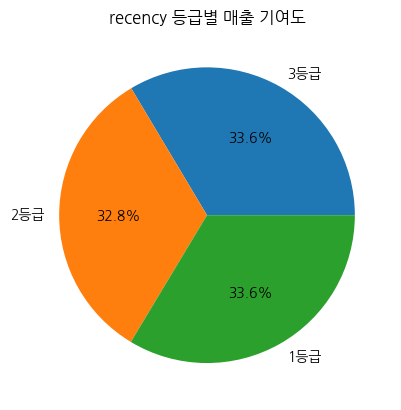

In [ ]:
# 최근성 등급별 매출 기여도 시각화
groupby_recency_grade['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f"{x}등급" for x in grade_labels[::-1]],
    title='recency 등급별 매출 기여도',
    ylabel=''
);

### F(구매빈도) 점수 구하기

In [ ]:
# 매체별 구매 횟수의 총합
customer_df['frequency_grade'] = pd.qcut(
    x=customer_df['num_purchase_total'],
    q=num_grades,
    labels=grade_labels
    )

In [ ]:
# 구매빈도 등급별 그룹화
groupby_frequency_grade = \
customer_df.groupby('frequency_grade').sum(numeric_only=True)

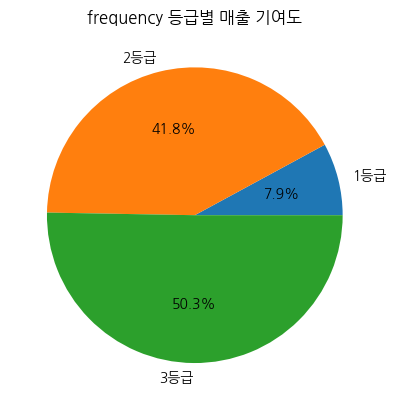

In [ ]:
# 구매빈도 등급별 매출 기여도 시각화
groupby_frequency_grade['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f"{x}등급" for x in grade_labels],
    title='frequency 등급별 매출 기여도',
    ylabel=''
);

### M(구매금액) 점수 구하기

In [ ]:
customer_df['monetary_grade'] = pd.qcut(
    x=customer_df['amount_total'],
    q=num_grades,
    labels=grade_labels
)

In [ ]:
groupby_monetary_grade = \
customer_df.groupby('monetary_grade').sum(numeric_only=True)

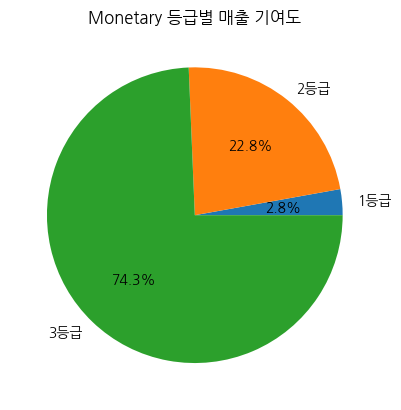

In [ ]:
# 구매금액 등급별 기여도 시각화
groupby_monetary_grade['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels],
    title='Monetary 등급별 매출 기여도',
    ylabel=''
);

## 6. RFM Score

- R, F, M 세 가지 점수를 결합하여,
- 각 고객의 전반적인 가치를 평가할 수 있는 하나의 점수를 산출합니다.
- 이 점수를 기반으로 고객 세분화, 타겟 마케팅, 리텐션 전략 수립 등 액션을 취합니다.

In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ID                     2205 non-null   int64   
 1   signup_ym              2205 non-null   object  
 2   age                    2205 non-null   int64   
 3   age_group              2205 non-null   category
 4   annual_income          2205 non-null   float64 
 5   marital_status         2205 non-null   object  
 6   children               2205 non-null   int64   
 7   recency                2205 non-null   int64   
 8   recency_grade          2205 non-null   category
 9   amount_alcohol         2205 non-null   int64   
 10  amount_fruit           2205 non-null   int64   
 11  amount_meat            2205 non-null   int64   
 12  amount_fish            2205 non-null   int64   
 13  amount_snack           2205 non-null   int64   
 14  amount_general         2205 non-null   int64 

In [ ]:
# 가중치
# 회사 목표에 따른 가중치 설정
# 예: 장기 고객의 충성도를 높이고자 한다면, 구매빈도와 총구매액이 중요할 수 있습니다.

weight = {}

weight['recency'] = 1/3
weight['frequency'] = 1/3
weight['monetary'] = 1/3

weight

{'recency': 0.3333333333333333,
 'frequency': 0.3333333333333333,
 'monetary': 0.3333333333333333}

In [ ]:
# rfm 점수 컬럼 생성
customer_df['rfm_score'] = \
weight['recency'] * customer_df['recency_grade'].astype('int')\
+ weight['frequency'] * customer_df['frequency_grade'].astype('int')\
+ weight['monetary'] * customer_df['monetary_grade'].astype('int')

In [ ]:
customer_df.head()

,ID,signup_ym,age,age_group,annual_income,marital_status,children,recency,recency_grade,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue,frequency_grade,monetary_grade,rfm_score
0,5524,2020-12,60,60대 이상,75579400.0,미혼,0,58,2,825500,114400,709800,223600,114400,114400,2102100,8,4,3,15,0,0,0,0,0,1,11,2,3,2.333333
1,2174,2022-06,63,60대 이상,60247200.0,미혼,2,38,2,14300,1300,7800,2600,1300,7800,35100,1,2,2,5,0,0,0,0,0,0,11,1,1,1.333333
2,4141,2021-11,52,50대,93096900.0,배우자 있음,0,26,3,553800,63700,165100,144300,27300,54600,1008800,8,10,1,19,0,0,0,0,0,0,11,3,2,2.666667
3,6182,2022-05,33,30대,34639800.0,배우자 있음,1,26,3,14300,5200,26000,13000,3900,6500,68900,2,4,2,8,0,0,0,0,0,0,11,1,1,1.666667
4,5324,2022-04,36,30대,75780900.0,배우자 있음,1,94,1,224900,55900,153400,59800,35100,19500,548600,5,6,5,16,0,0,0,0,0,0,11,3,2,2.000000


In [ ]:
# 고객의 RFM 점수를 기준으로, 3 구간으로 분할합니다.
# 1은 하위 고객(낮은 RFM 점수) => 3은 상위 고객(높은 RFM 점수)
customer_df['rfm_segment'] = \
pd.qcut(customer_df['rfm_score'], q=3, labels=[1, 2, 3])

In [ ]:
customer_df['rfm_segment'].value_counts()

,count
rfm_segment,
1,926
2,811
3,468


## 7. RFM 데이터 분석

In [ ]:
# 그룹별 평균 R, F, M을 계산
grouped_mean_metric = customer_df.groupby('rfm_segment').agg(
    {'recency': 'mean',
    'num_purchase_total': 'mean',
    'amount_total': 'mean'}
)

In [ ]:
grouped_mean_metric.rename(columns={
    'recency': '평균 최근구매성',
    'num_purchase_total': '평균 구매빈도',
    'amount_total': '평균 구매금액'
}, inplace=True)

In [ ]:
grouped_mean_metric

,평균 최근구매성,평균 구매빈도,평균 구매금액
rfm_segment,,,
1,55.372570,7.071274,1.548895e+05
2,55.087546,14.747226,1.085391e+06
3,25.884615,18.134615,1.529433e+06
